In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

import random
import math

In [2]:
import world_bank_data as wb

pop = pd.DataFrame(wb.get_series('SP.POP.TOTL', mrv=1))
pop = pop.reset_index()

In [3]:
# pop[pop['Country'] == 'Korea, Rep.']
# pd.set_option('display.max_rows', 500)
# display(pop)

In [4]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', \
                 parse_dates=True)

In [5]:
df = df[df['Province/State'] != 'Diamond Princess']
df = df[df['Province/State'] != 'Grand Princess']

In [6]:
df = df.groupby('Country/Region').sum()

In [7]:
df = df.T

In [8]:
df = df.drop('Lat')
df = df.drop('Long')

In [9]:
df = df.rename(columns={"US": "United States"}, errors="raise")
df = df.rename(columns={"Korea, South": "Korea, Rep."}, errors="raise")
df.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country/Region', length=175)

In [10]:
df.index = pd.to_datetime(df.index)

In [11]:
df.index.name = 'Date'

In [12]:
today = df.iloc[-1]

In [13]:
print(today[(today >= 100) & (today < 1000)].index)
print(today[(today >= 1000) & (today < 10000)].index)
print(today[(today >= 10000)].index)

Index(['Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahrain', 'Bosnia and Herzegovina', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Diamond Princess', 'Dominican Republic', 'Egypt', 'Estonia', 'Finland',
       'Ghana', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq',
       'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania',
       'Malta', 'Mexico', 'Moldova', 'Morocco', 'New Zealand',
       'North Macedonia', 'Oman', 'Panama', 'Peru', 'Philippines', 'Qatar',
       'Russia', 'San Marino', 'Senegal', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'Sri Lanka', 'Taiwan*', 'Tunisia',
       'Ukraine', 'United Arab Emirates', 'Uruguay', 'Venezuela', 'Vietnam'],
      dtype='object', name='Country/Region')
Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czechia', 'Denmark', 'Ecuador', 'Ireland', 'Israel', 'Japan',
   

In [14]:
condition = today[(today > 5000)].index
print(list(condition))

['Austria', 'Belgium', 'China', 'France', 'Germany', 'Iran', 'Italy', 'Korea, Rep.', 'Netherlands', 'Spain', 'Switzerland', 'United States', 'United Kingdom']


In [15]:
countries = list(condition)
countries.remove('Iran')
countries.remove('China')
countries.append('Canada')

min_case_num = 500
min_case_pct = 1/100000.
title_name = "countries with cases >5000 excl. China, Iran, incl. Canada"

In [16]:
data = {}
data_original = {}
data_pct = {}

for c in countries:
    data_original[c] = df[c]

    country = df[c]
    country100 = country[country >= min_case_num]
    country100 = country100.reset_index()
    data[c] = country100[c]
    
    size = pop[pop['Country'] == c]['SP.POP.TOTL']
    df[c+' (by population)'] = df[c] * 1. / int(size)

    country_pct = df[c+' (by population)']
    country0_00001 = country_pct[country_pct >= min_case_pct]
    country0_00001 = country0_00001.reset_index()
    data_pct[c] = country0_00001[c+' (by population)']

Text(0.5, 0, 'Days after passing 500 confirmed cases')

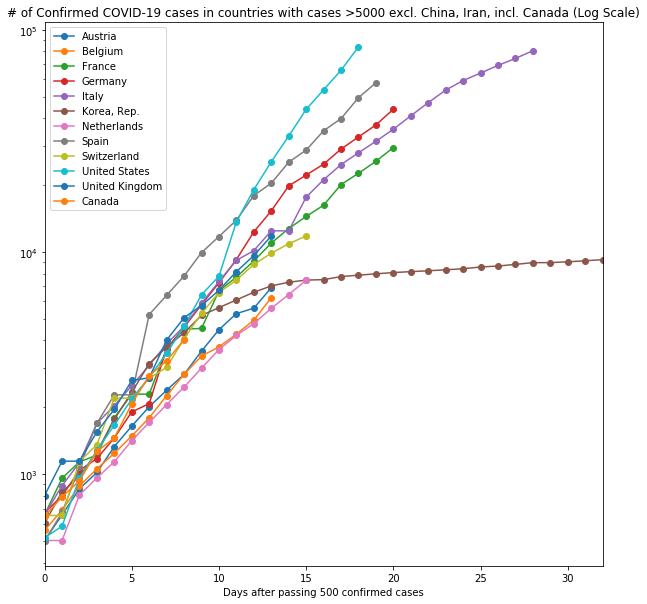

In [17]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data[c].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Log Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Text(0.5, 0, 'Days after passing 500 confirmed cases')

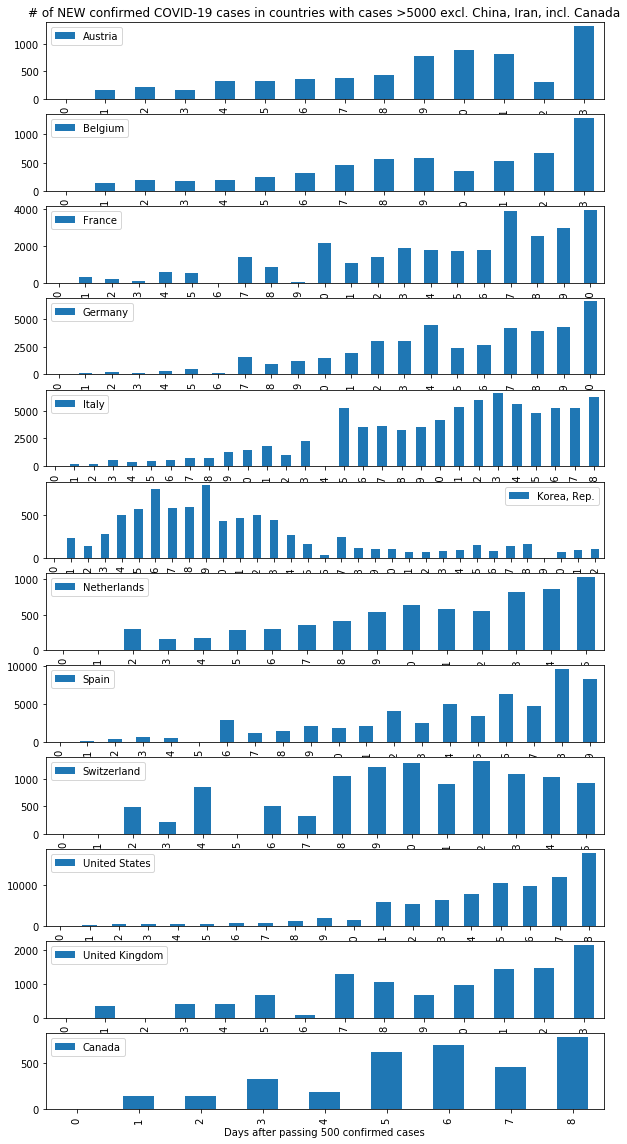

In [18]:
fig, axes = plt.subplots(len(data.keys()), figsize=(10, 20))

i = 0
for c in data.keys():
    data[c].diff().plot(ax=axes[i], kind="bar")
    axes[i].legend()
    i += 1

axes[0].set_title("# of NEW confirmed COVID-19 cases in " + title_name)
axes[-1].set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

In [19]:
# pd.DataFrame([1,1.2,1.2**3]).pct_change()

In [20]:
for c in data.keys():
    size = pop[pop['Country'] == c]['SP.POP.TOTL']
    growth_rate = data[c].tail(5).pct_change().mean()
    num_cases = data[c].iloc[-1]
    projected_num_cases = int(num_cases*(1+growth_rate)**5)
    
    print(c)
    print('growth rate:', round(growth_rate * 100, 2),'%')
    print('doubling time:', round(math.log(2)/math.log(1+growth_rate),1),'days')

    print('% Infected (today)', round(num_cases / int(size) * 100, 4), '%')
    print('% Infected (projected in 5 days)', round(projected_num_cases / int(size) * 100, 4), '%')
    print('# Infected (today) / Total Population:', int(num_cases),'/',int(size))
    print('# Infected (projected in 5 days) / Total Population:', int(projected_num_cases),'/',int(size))

    print('--')

Austria
growth rate: 18.1 %
doubling time: 4.2 days
% Infected (today) 0.0781 %
% Infected (projected in 5 days) 0.1794 %
# Infected (today) / Total Population: 6909 / 8847037
# Infected (projected in 5 days) / Total Population: 15872 / 8847037
--
Belgium
growth rate: 16.51 %
doubling time: 4.5 days
% Infected (today) 0.0546 %
% Infected (projected in 5 days) 0.1172 %
# Infected (today) / Total Population: 6235 / 11422068
# Infected (projected in 5 days) / Total Population: 13387 / 11422068
--
France
growth rate: 16.23 %
doubling time: 4.6 days
% Infected (today) 0.0441 %
% Infected (projected in 5 days) 0.0936 %
# Infected (today) / Total Population: 29551 / 66987244
# Infected (projected in 5 days) / Total Population: 62673 / 66987244
--
Germany
growth rate: 15.3 %
doubling time: 4.9 days
% Infected (today) 0.053 %
% Infected (projected in 5 days) 0.108 %
# Infected (today) / Total Population: 43938 / 82927922
# Infected (projected in 5 days) / Total Population: 89548 / 82927922
--
I

In [21]:
# print(data_pct)

Text(0.5, 0, 'Days after infecting at least 1 out of 100,000 people')

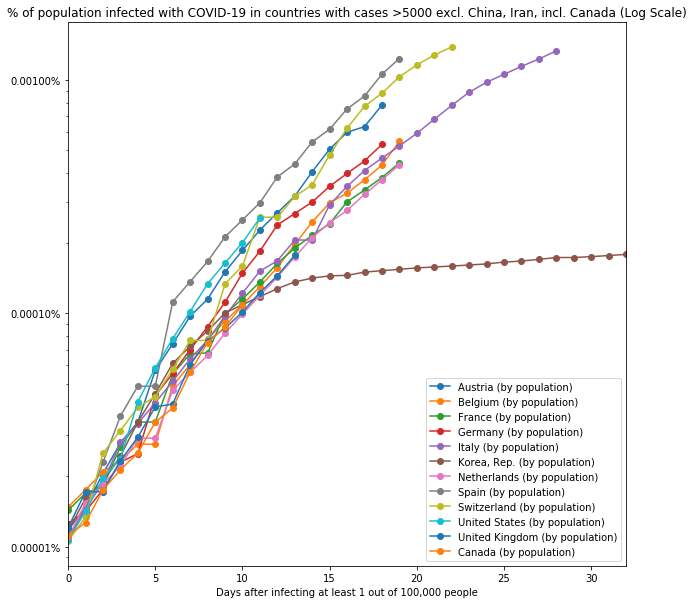

In [22]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
#     if c != 'United States':
#         data_pct[c].plot(logy=True, marker='o', color="grey")
#     else:
        data_pct[c].plot(logy=True, marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("% of population infected with COVID-19 in " + title_name + " (Log Scale)")
axes.set_xlabel("Days after infecting at least 1 out of 100,000 people")

Text(0.5, 0, 'Days after infecting at least 1 out of 100,000 people')

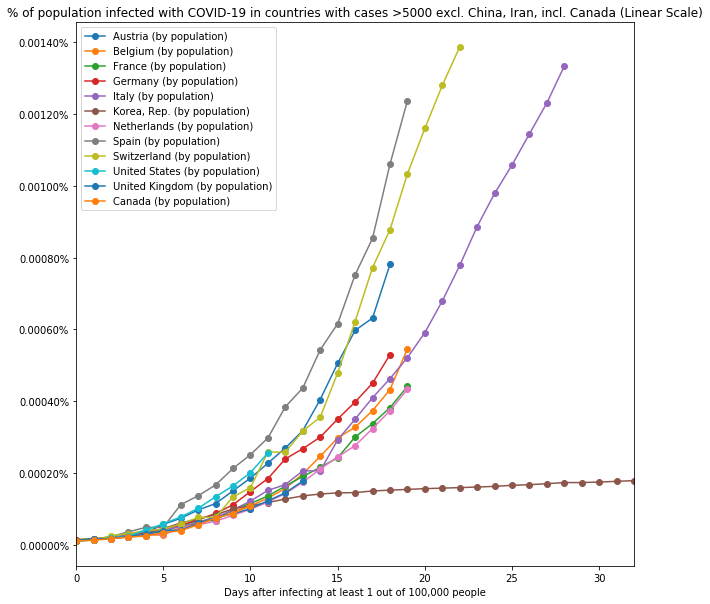

In [23]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
#     if c != 'United States':
#         data_pct[c].plot(marker='o', color="grey")
#     else:
    data_pct[c].plot(marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("% of population infected with COVID-19 in " + title_name + " (Linear Scale)")
axes.set_xlabel("Days after infecting at least 1 out of 100,000 people")

Text(0.5, 0, 'Days after infecting at least 1 out of 100,000 people')

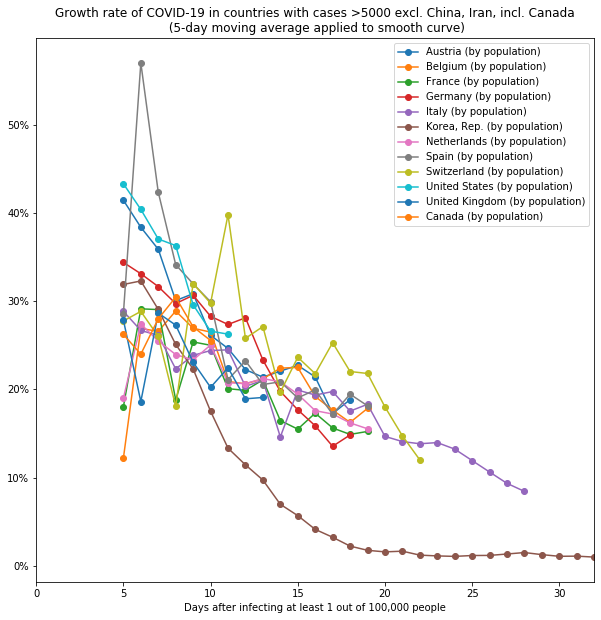

In [24]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    growth_rate = data_pct[c].rolling(window=5).mean().pct_change() * 100.
    
#     if c != 'France':
#         growth_rate.plot(marker='o', color="grey")
#     else:
    growth_rate.plot(marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("Growth rate of COVID-19 in " + title_name + "\n (5-day moving average applied to smooth curve)")
axes.set_xlabel("Days after infecting at least 1 out of 100,000 people")

Text(0.5, 0, 'Days after infecting at least 1 out of 100,000 people')

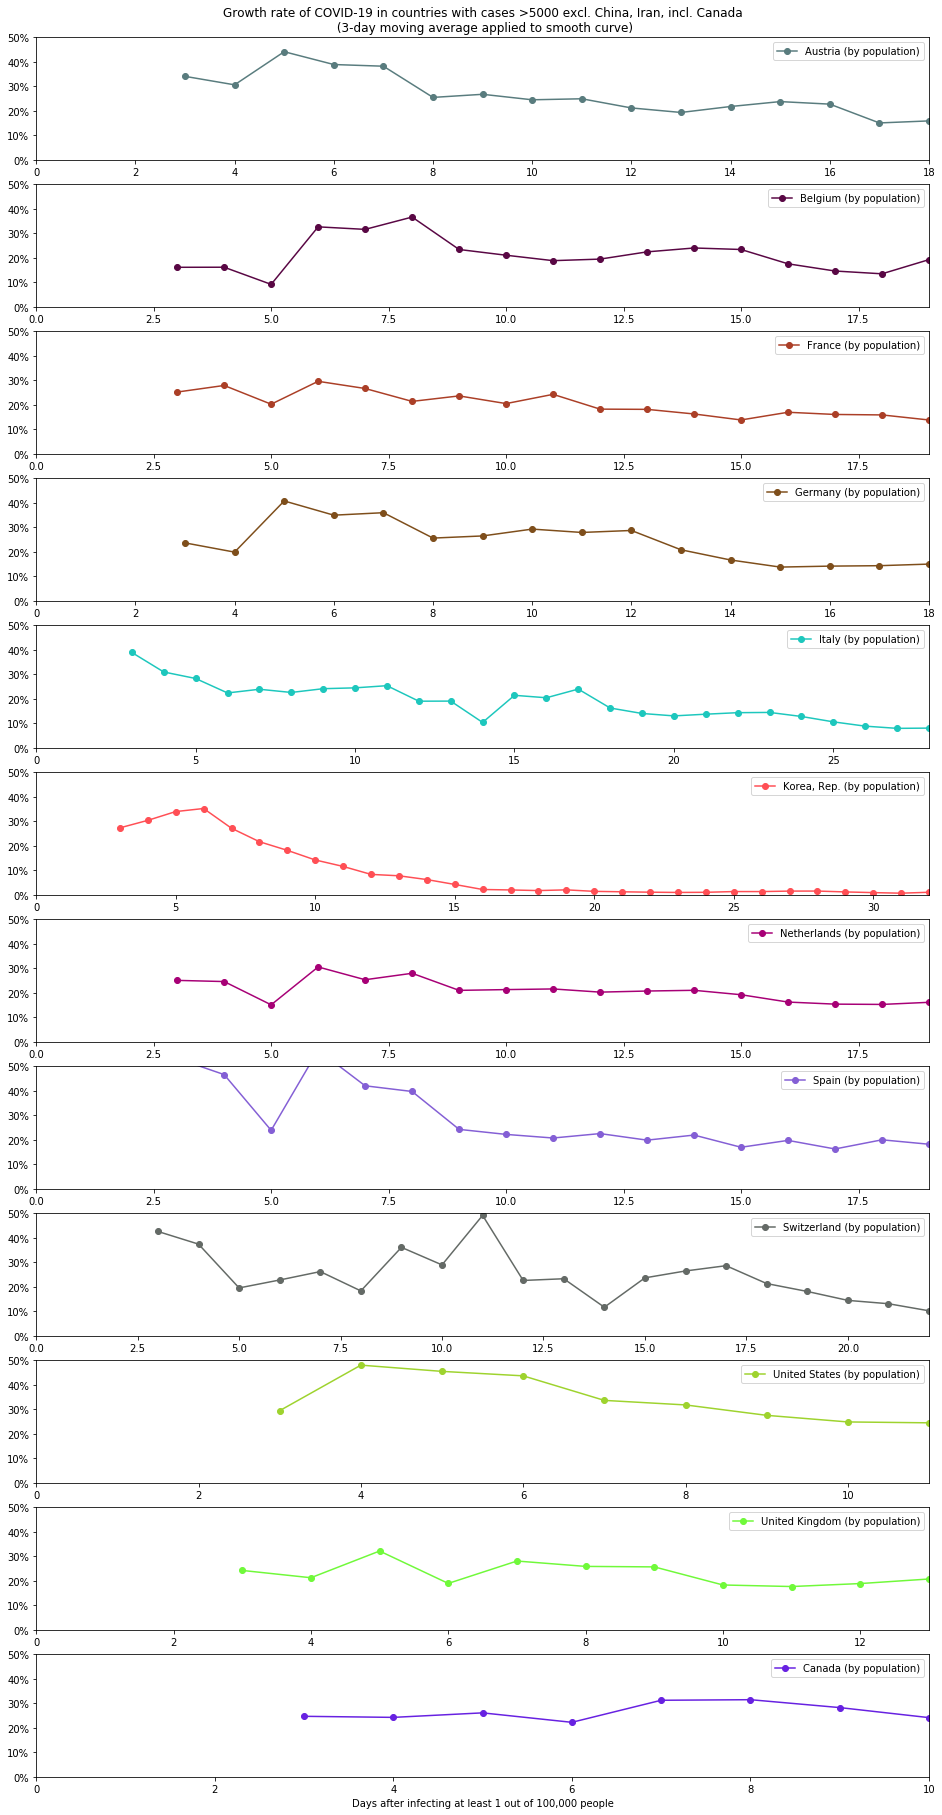

In [25]:
fig, axes = plt.subplots(len(data_pct.keys()), figsize=(16, 32))

def random_color():
    r = lambda: random.randint(0,255)
    return('#%02X%02X%02X' % (r(),r(),r()))

i=0
for c in data.keys():
    growth_rate = data_pct[c].rolling(window=3).mean().pct_change() * 100.
    
    growth_rate.plot(marker='o', ax=axes[i], c=random_color())
    
    axes[i].legend()
    axes[i].set_ylim(0,50)
    axes[i].yaxis.set_major_formatter(mtick.PercentFormatter())

    i+=1

axes[0].set_title("Growth rate of COVID-19 in " + title_name + "\n (3-day moving average applied to smooth curve)")
axes[-1].set_xlabel("Days after infecting at least 1 out of 100,000 people")

Text(0.5, 0, 'Days after passing 500 confirmed cases')

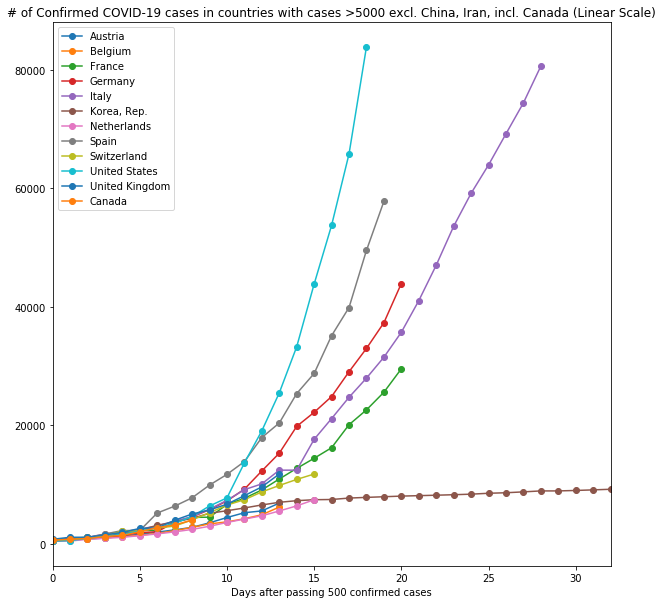

In [26]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data[c].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Linear Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

In [27]:
# fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

# for s in data.keys():
#     data_original[s].plot(logy=True, marker='o')

# axes.legend()
# axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Log Scale)")
# axes.set_xlabel("Dates")

Text(0.5, 0, 'Dates')

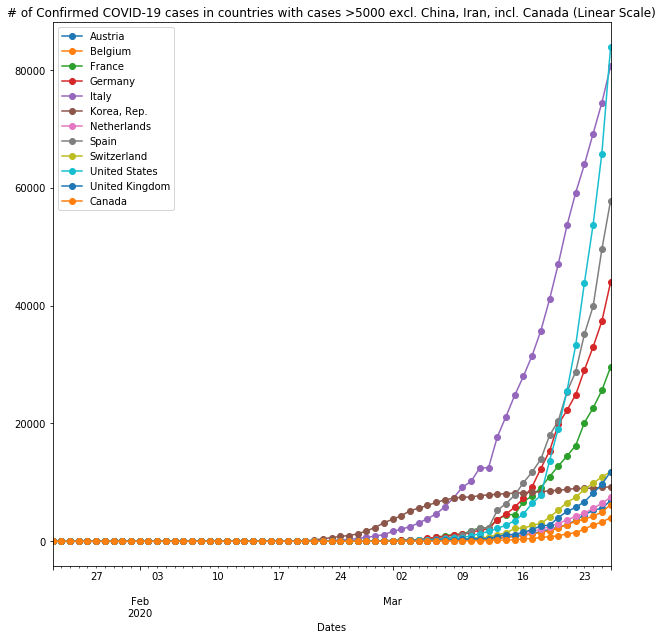

In [28]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Linear Scale)")
axes.set_xlabel("Dates")

In [29]:
new_data = {}
# diff = {}
# data_original = {}
new_data_pct = {}
min_case_num = 100

for c in countries:
#     data_original[c] = df[c]

    country = df[c]
    country_min_case = country[country >= min_case_num]
    country_min_case = country_min_case.reset_index()
    new_data[c] = pd.concat([country_min_case[c], country_min_case[c].diff()], axis=1)
    new_data[c].columns = ['total', 'diff']
    new_data[c] = new_data[c].iloc[1:]
    new_data[c]['total_rolling'] = new_data[c]['total'].rolling(window=5).mean()
    new_data[c]['diff_rolling'] = new_data[c]['diff'].rolling(window=5).mean()
    
    size = pop[pop['Country'] == c]['SP.POP.TOTL']
    df[c+'_by_pop'] = df[c] * 1. / int(size)

    country_pct = df[c+'_by_pop']
    country0_00001 = country_pct[country_pct >= min_case_pct]
    country0_00001 = country0_00001.reset_index()
    new_data_pct[c] = pd.concat([country0_00001[c+'_by_pop'], country0_00001[c+'_by_pop'].diff()], axis=1)
    new_data_pct[c].columns = ['total_by_pop', 'diff_by_pop']
    new_data_pct[c] = new_data_pct[c].iloc[1:]
    new_data_pct[c]['total_by_pop_rolling'] = new_data_pct[c]['total_by_pop'].rolling(window=5).mean()
    new_data_pct[c]['diff_by_pop_rolling'] = new_data_pct[c]['diff_by_pop'].rolling(window=5).mean()
    
print(new_data['Canada'])
print(new_data_pct['Canada'])

     total   diff  total_rolling  diff_rolling
1    117.0    9.0            NaN           NaN
2    191.0   74.0            NaN           NaN
3    196.0    5.0            NaN           NaN
4    250.0   54.0            NaN           NaN
5    413.0  163.0          233.4          61.0
6    470.0   57.0          304.0          70.6
7    648.0  178.0          395.4          91.4
8    791.0  143.0          514.4         119.0
9    933.0  142.0          651.0         136.6
10  1267.0  334.0          821.8         170.8
11  1456.0  189.0         1019.0         197.2
12  2075.0  619.0         1304.4         285.4
13  2777.0  702.0         1701.6         397.2
14  3238.0  461.0         2162.6         461.0
15  4029.0  791.0         2715.0         552.4
    total_by_pop  diff_by_pop  total_by_pop_rolling  diff_by_pop_rolling
1       0.000013     0.000002                   NaN                  NaN
2       0.000017     0.000005                   NaN                  NaN
3       0.000021     0.000004

Text(0, 0.5, 'NEW number of cases')

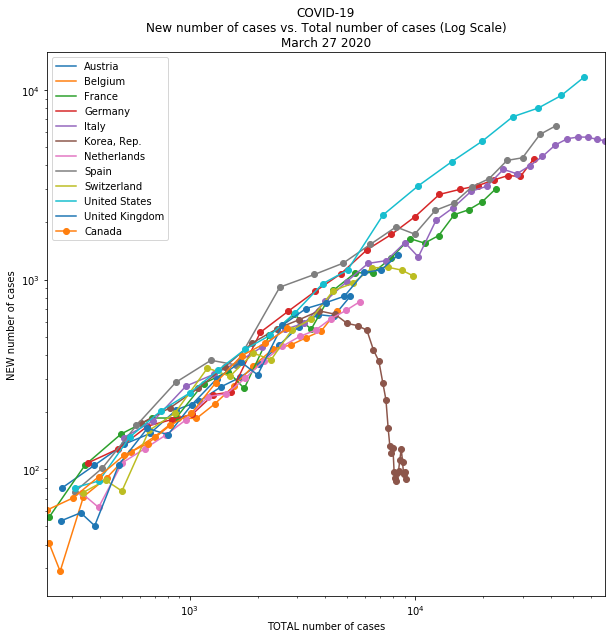

In [30]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in new_data.keys():
    new_data[c].plot(logx=True, logy=True, marker='o', x="total_rolling", y="diff_rolling", ax=axes, label=c)

# axes.legend()
# axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("COVID-19\nNew number of cases vs. Total number of cases (Log Scale)\nMarch 27 2020")
axes.set_xlabel("TOTAL number of cases")
axes.set_ylabel("NEW number of cases")

Text(0, 0.5, 'NEW number of cases as a percentage of national population')

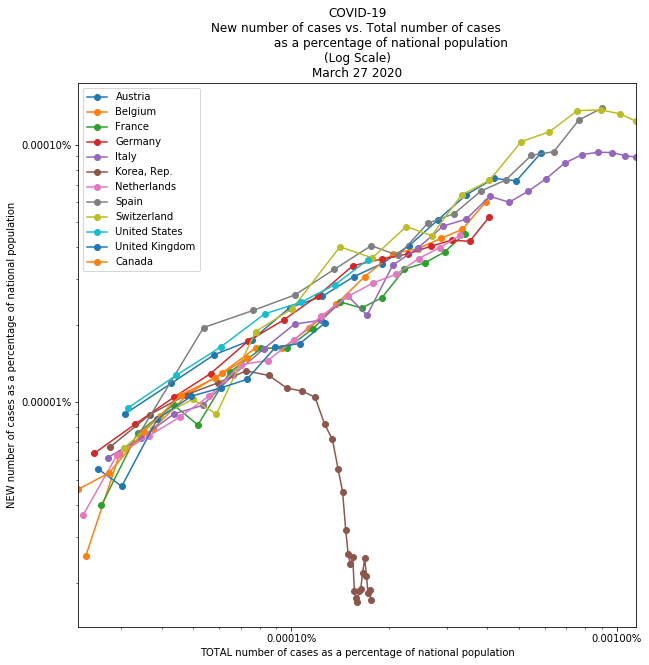

In [31]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in new_data_pct.keys():
    new_data_pct[c].plot(logx=True, logy=True, marker='o', x="total_by_pop_rolling", y="diff_by_pop_rolling", \
                     ax=axes, label=c)

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.xaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("COVID-19\nNew number of cases vs. Total number of cases \n\
                 as a percentage of national population\n(Log Scale)\nMarch 27 2020")
axes.set_xlabel("TOTAL number of cases as a percentage of national population")
axes.set_ylabel("NEW number of cases as a percentage of national population")